In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('hotel_bookings.csv')
df_names = df.copy()

In [2]:
df.drop(columns=['agent','company',"reservation_status"],inplace=True)
df['country'].fillna(inplace=True,value=df['country'].mode)
df['children'].fillna(inplace=True,value=0)
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
type(df['reservation_status_date'])

pandas.core.series.Series

In [3]:
def convertirMesEscritoNumero(df,columna_a_editar):
    month_mapping = {
        'January': 1,
        'February': 2,
        'March': 3,
        'April': 4,
        'May': 5,
        'June': 6,
        'July': 7,
        'August': 8,
        'September': 9,
        'October': 10,
        'November': 11,
        'December': 12
    }
    df[columna_a_editar] = df[columna_a_editar].apply(lambda x: month_mapping[x.capitalize()] if x.capitalize() in month_mapping else None)

convertirMesEscritoNumero(df,'arrival_date_month')

In [4]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
# df['reservation_status_date'].value_counts()
# df['reservation_status_date'].dt.day

In [5]:
def funcion_agrupoacion_cut(labels,bins,df_columna):
    # Agrupación de una columna de data sets
        # [0, 2), [2, 3), [3, ∞) Estos serán los limites que ajusto
    if(len(labels) == len(bins)-1):
        return pd.cut(df_columna, bins=bins, labels=labels, right=False)
    else:
        print("\x1b[1;31m",'\nEl datos labels o bins está mal estructurado',"\033[0;m")
        print("\t Ejemplo: labels = ['0', '10', '20', '30+']  bins = [0, 10, 20, 30, float('inf')]\n") 

In [6]:
# print(df['adults'].value_counts().sort_index())
df['adults'] = funcion_agrupoacion_cut(labels = ['1', '2', '3'], bins = [0, 2, 3, float('inf')], df_columna=df['adults'])
# df['adults'].value_counts().sort_index()

In [7]:
# print(df['adr'].value_counts().sort_index())
df['adr'] = funcion_agrupoacion_cut(labels = ['1', '2', '3', '4'], bins = [0, 50, 100, 150, float('inf')], df_columna=df['adr'])
# df['adr'].value_counts().sort_index()

In [8]:
# print(df['children'].value_counts().sort_index())
df['children'] = funcion_agrupoacion_cut(labels = ['0', '1', '2', '3'], bins = [0, 1, 2, 3, float('inf')], df_columna=df['children'])
# df['children'].value_counts().sort_index()

In [9]:
# print(df['babies'].value_counts().sort_index())
df['babies'] = funcion_agrupoacion_cut(labels = ['0', '1', '2'], bins = [0, 1, 2, float('inf')], df_columna=df['babies'])
# df['babies'].value_counts().sort_index()

In [10]:
def categorico_a_numerico_mapeo(columna, dft):
    # print(dft[columna].value_counts().sort_index())
    columnas = dft[columna].unique()
    mapeo = {}
    let = 1
    for col in columnas:
        mapeo[col] = let
        let+=1

    dft[columna] = dft[columna].replace(mapeo)
    # print(df[columna].value_counts().sort_index())
    return dft

In [11]:
df = categorico_a_numerico_mapeo('customer_type',df)
df = categorico_a_numerico_mapeo("deposit_type",df)
df = categorico_a_numerico_mapeo("assigned_room_type",df)
df = categorico_a_numerico_mapeo("reserved_room_type",df)
df = categorico_a_numerico_mapeo("meal",df)
df = categorico_a_numerico_mapeo("market_segment",df)
df = categorico_a_numerico_mapeo("distribution_channel",df)
df = categorico_a_numerico_mapeo("country",df)
# print(df['country'].value_counts())

In [12]:
df['country'] = funcion_agrupoacion_cut(bins=[0, 100, 1000, float('inf')], labels=['1', '2', '3'], df_columna=df['country'].astype("int"))
# df['country'].value_counts()

In [13]:
df['hotel'] = np.where(df["hotel"] == "City Hotel", 0, 1)

# **El dataset no está balanceado**
Ya que tenemos muy pocos casos de fraude por lo que el modelo puede no ser capaz de diferenciar entre fraude y correcto uso de la tarjeta.

In [14]:
df['is_canceled'].value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

In [15]:
cancelado = df[df.is_canceled == 1]
no_cancelado = df[df.is_canceled == 0]
print(cancelado.shape)
print(no_cancelado.shape)

(44224, 29)
(75166, 29)


In [16]:
no_cancelado = df[df['is_canceled'] == 0].sample(n=len(cancelado)+324, random_state=42)
print(no_cancelado.shape)

(44548, 29)


In [17]:
df['is_canceled'].value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

In [18]:
df = pd.concat([cancelado, no_cancelado], axis=0)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
8,1,1,85,2015,7,27,1,0,3,2,...,2,2,0,1,0,1,2,0,1,2015-05-06
9,1,1,75,2015,7,27,1,0,3,2,...,3,3,0,1,0,1,3,0,0,2015-04-22
10,1,1,23,2015,7,27,1,0,4,2,...,4,4,0,1,0,1,3,0,0,2015-06-23
27,1,1,60,2015,7,27,1,2,5,2,...,4,4,0,1,0,1,3,0,2,2015-05-11
32,1,1,96,2015,7,27,1,2,8,2,...,4,4,0,1,0,1,3,0,2,2015-05-29


In [19]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               1
required_car_parking_spaces       0
total_of_special_requests   

In [20]:
# Como hay un nulo, en la columna adr por asegurar creo una funcion bucle que llena los pequeños nulos con la moda
### IMPORTANTE, SOLO CUANDO SE GENERA UNO O DOS NULOS, NO MUCHOS!!!
# df = df['is_canceled']
def moda_pocos_nulos(col,dft):
    if df[col].isnull().sum() != 0:
        df[col].fillna(df[col].mode().iloc[0])

# No funcionaba la funcion, asi que he echo lo siguiente:
df.dropna(subset=['adr'],inplace=True)


In [21]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

# **Normalizamos y separamos los datos**

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Assuming df_7 is your DataFrame
y = df['is_canceled']
X = df.drop(columns=['is_canceled', 'reservation_status_date'], axis=1)

# Apply StandardScaler to the entire X DataFrame
X = scaler.fit_transform(X)
y.value_counts()

is_canceled
0    44547
1    44224
Name: count, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(71016, 27) (17755, 27) (71016,) (17755,)


# Voy a montar un Pipeline, y voy a entrenar con Arboles de decisiones

In [30]:
"""PIPELINE"""
from sklearn.pipeline import Pipeline
"""TREE DECISION CLASSIFIER"""
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
"""METRICS"""
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


pasos = [('scaler', StandardScaler()), 
         ('feature_selection', SelectKBest(score_func=f_classif, k=2)), #X.shape[1])),
         ('clf', DecisionTreeClassifier())]   


""" En este ejemplo, primero se estandarizan los datos utilizando StandardScaler, 
    luego se seleccionan las dos mejores características con SelectKBest y 
    finalmente se entrena un modelo de árbol de decisión con DecisionTreeClassifier """

# Creamos la pipeline
pipeline = Pipeline(pasos)

In [31]:
y = df['is_canceled']
X = df.drop(columns=['is_canceled', 'reservation_status_date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(71016, 27) (17755, 27) (71016,) (17755,)


In [32]:
# Entrenamos la pipeline
pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection', SelectKBest(k=2)),
                ('clf', DecisionTreeClassifier())])

In [33]:
# Accuracy en training data
Y_pred = pipeline.predict(X_train)
training_data_accuracy = accuracy_score( y_pred = Y_pred , y_true = y_train )
print('Accuracy on Training Data: ',training_data_accuracy)

# Accuracy en test data
y_pred = pipeline.predict(X_test)
test_data_accuracy = accuracy_score( y_pred = y_pred, y_true = y_test )
print('Accuracy on Test Data: ',test_data_accuracy)

Accuracy on Training Data:  0.6956178889264392
Accuracy on Test Data:  0.678175161926218


In [34]:
# métricas de clasificación
report = classification_report(y_true=y_test, y_pred=y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.63      0.86      0.73      8848
           1       0.78      0.50      0.61      8907

    accuracy                           0.68     17755
   macro avg       0.70      0.68      0.67     17755
weighted avg       0.70      0.68      0.67     17755



In [35]:
cm = confusion_matrix( y_true = y_test , y_pred = y_pred )
print(cm)

[[7587 1261]
 [4453 4454]]


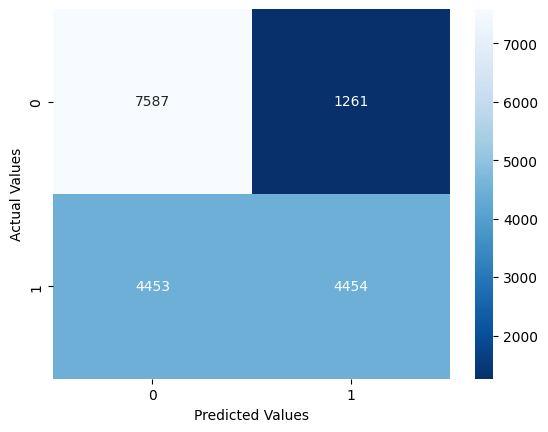

In [36]:
sns.heatmap(cm, annot=True, cmap='Blues_r' ,fmt='d')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

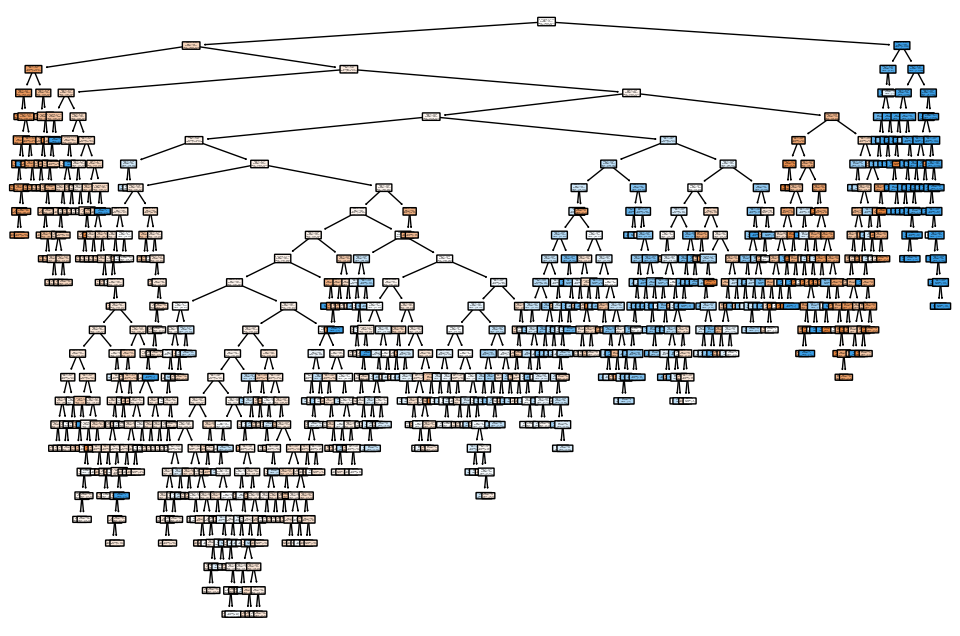

In [37]:
# Visualizar el árbol de decisión
plt.figure(figsize=(12, 8))
class_names = ['Canceled','Not Canceled']  # Convertir a strings y obtener los únicos
plot_tree(pipeline.named_steps['clf'], filled=True, feature_names=df_names.columns, class_names=class_names, rounded=True)
plt.show()

In [38]:
# Ya que no somos capaz de leer el arbol, buscamos otras alternativas

feature_importances = pipeline.named_steps['clf'].feature_importances_
print("Importancia de características:", feature_importances)

# Esto nos da un porcentaje para saber que caracteristica ha sido la más importante para la decisión

Importancia de características: [0.27999006 0.72000994]


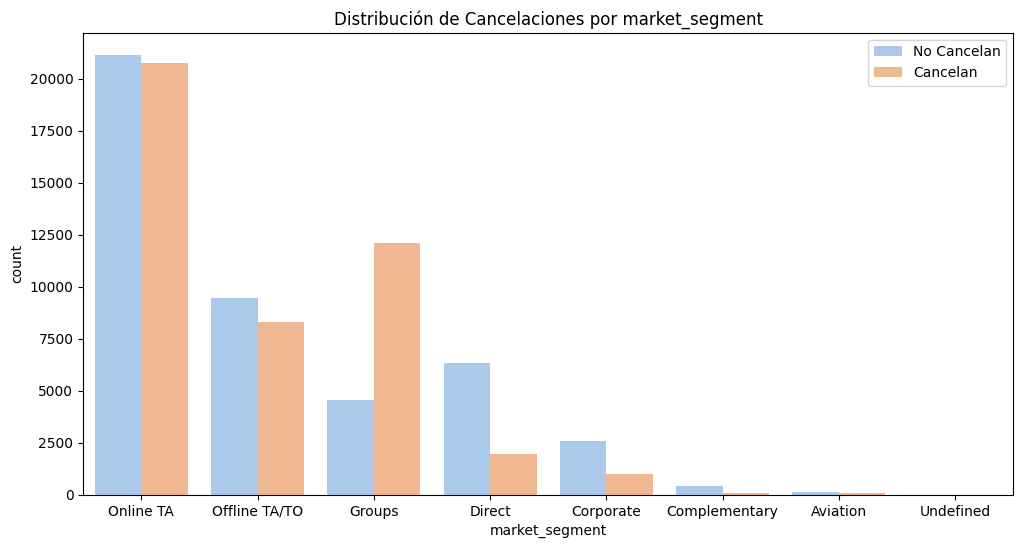

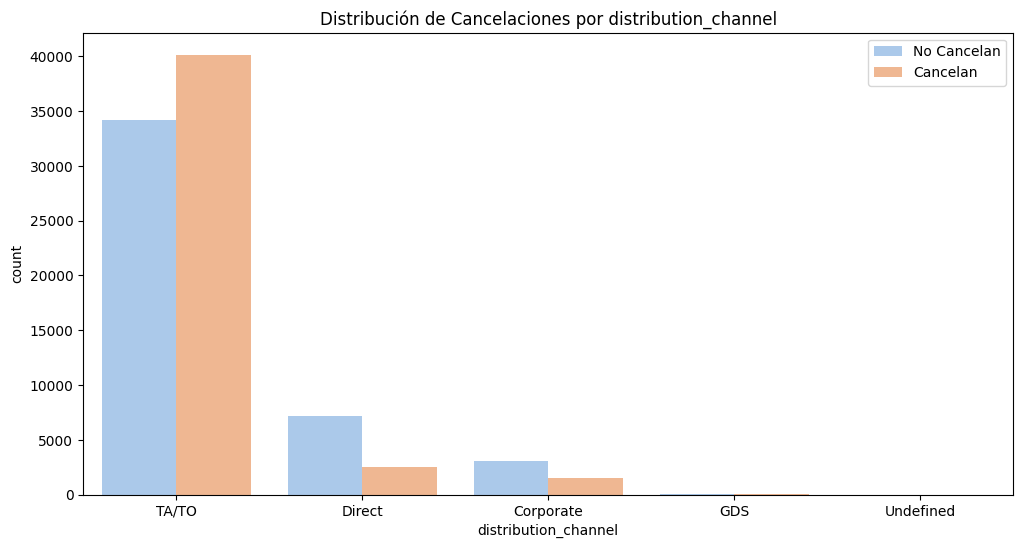

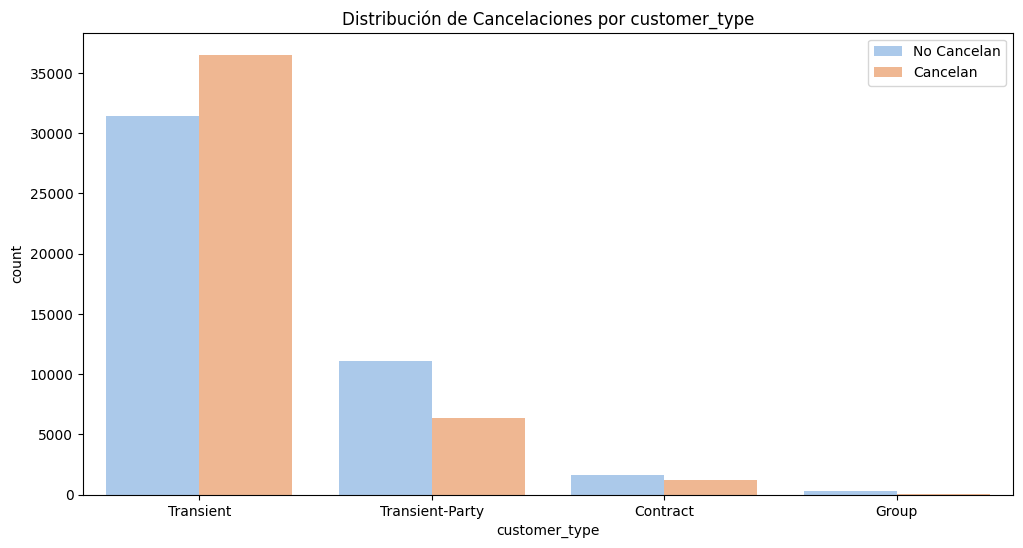

In [39]:
# Selecciona solo las columnas categóricas
categorical_cols = df.select_dtypes(include=['category']).columns

import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['market_segment', 'distribution_channel', 'customer_type']

# Gráfico de barras para columnas que yo selecciono
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
                    # Nombres Originales # Col Objetivo en y        # Colores           # Ordeno las columnas de mayor a menor
    ax = sns.countplot(x=df_names[col], hue='is_canceled', data=df, palette='pastel', order=df_names[col].value_counts().index)
    plt.title(f'Distribución de Cancelaciones por {col}')

# Etiquetas de la leytenda
    handles, labels = ax.get_legend_handles_labels()
    labels = ['No Cancelan', 'Cancelan']
    ax.legend(handles, labels)

    plt.show()
# Si la barra es más alta en la categoría "Cancelado" (por ejemplo, si hay más barras azules), 
    # significa que hay más reservas canceladas en esa categoría en particular.

# Si la barra es más baja en la categoría "Cancelado" (por ejemplo, si hay más barras naranjas), 
    # significa que hay menos reservas canceladas en esa categoría.
